# 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(666)
x = np.random.uniform(-3,3,100)
X = x.reshape(-1,1)
y = 0.5*x**2 + x + 2 +np.random.normal(0,1,size=len(x))

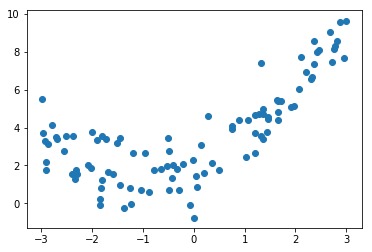

In [14]:
plt.scatter(X,y)
plt.show()

In [15]:
from sklearn.linear_model import  LinearRegression

In [19]:
lin1 = LinearRegression()
lin1.fit(X,y)
y_predict = lin1.predict(X)

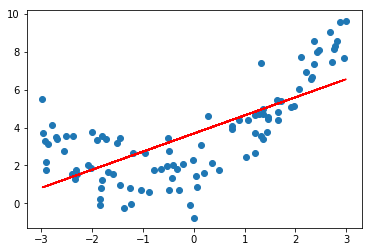

In [20]:
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.show()
#这种情况   他并没有反映我们数据的特征   他的错误  是由于太过简单了
#叫做   欠拟合    orderfiting

In [22]:
# 使用多项式回归    因为它本质上之上增加我们的维度   之后用线性回归来拟合我们的数据，
#因此 我们可以用 R2 来判断出我们的好坏，但是    可能会有疑问   我们直接使用线性回归
#和我们增加维度之后使用线性回归    方程是不一样的   系数也不同，所以我们的R2可以衡量
#我们的指标   但是有人会怀疑  不同的维度 为了避免这中疑问   我们用均方误差 
#因为我们的军方误差就是对同样的一组数据进行拟合，使用不同的方法来用均方误差是具有可比性的

In [23]:
#均方误差
from sklearn.metrics import mean_squared_error

In [24]:
y_predict = lin1.predict(X)
mean_squared_error(y_predict,y)

3.0750025765636577

# 多项式回归

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [39]:
#使用 管道    Pipeline
def PolynomialRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',LinearRegression())   
    ]
    )

In [40]:
poly2_reg = PolynomialRegression(2)

In [42]:
poly2_reg.fit(X,y)
y2_predict = poly2_reg.predict(X)

In [43]:
# 看一下此时的均方误差

In [44]:
mean_squared_error(y2_predict,y)

1.0987392142417858

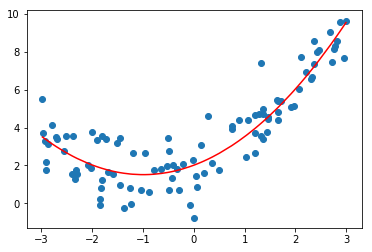

In [50]:
#显然更加符合
plt.scatter(X,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color='r')
plt.show()

In [52]:
#传入10
poly3_reg = PolynomialRegression(10)
poly3_reg.fit(X,y)
y3_predict = poly3_reg.predict(X)
mean_squared_error(y3_predict,y)

1.0508466763764126

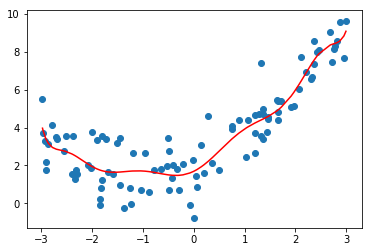

In [53]:
#显然更加符合
plt.scatter(X,y)
plt.plot(np.sort(x),y3_predict[np.argsort(x)],color='r')
plt.show()

In [55]:
#传入100
poly4_reg = PolynomialRegression(100)
poly4_reg.fit(X,y)
y4_predict = poly4_reg.predict(X)
mean_squared_error(y4_predict,y)

0.68392234518647044

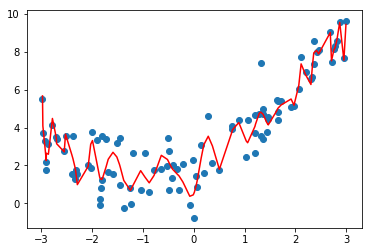

In [56]:
#显然更加符合
plt.scatter(X,y)
plt.plot(np.sort(x),y4_predict[np.argsort(x)],color='r')
plt.show()

In [ ]:
'''事实上  当我们的degree=100的时候  这并不是我们的拟合曲线，这是因为我们的这个图
像绘制出来的曲线只是原有的数据点之间对应的y的预测值之间链接出来的结果，不过有很多地方
可能没有那个数据点，因此图像可能不准确'''

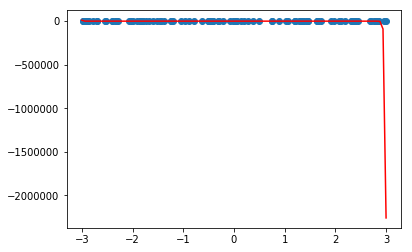

In [60]:
# 我们这次取值是均匀的取值  ，因此不会出现两个点之间相隔太大的情况
X_plot = np.linspace(-3,3,100).reshape(-1,1)
y_plot = poly4_reg.predict(X_plot)

plt.scatter(X,y)
plt.plot(X_plot,y_plot,color='r')
plt.show()

In [61]:
#我们通过y轴可以看出   他的图线    我们对他的x y 限定一下

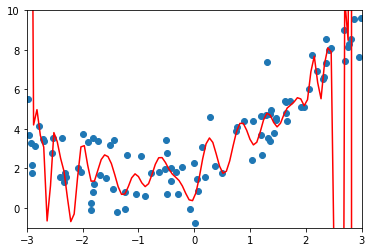

In [64]:
plt.scatter(X,y)
plt.plot(X_plot,y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()

In [ ]:
#这个就是我们拟合出来的曲线
#很显然   我们传进去degree越高  我们的拟合结果会越好   我们有这么多的样本点，
#我们总能找到一条直线，这个曲线可以将我们所有的样本点进行拟合，使我们的所有的样本点
# 都在我们的这条曲线上    是的我们的均方误差为0     那么我们的degree是非常高的
#但是在这种时候    这个拟合的结果在我们的看来是非常好的，但是他真的使我们想要的这条
# 曲线的走势吗？    从X = 2.4  这个曲线看他的y可能会落在0.1上   这个是我们想要的吗？
# 显然不是  我们虽然拟合了一个非常高维的数据   变得非常复杂    这个就叫做  overfitting
# 过拟合